In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [259]:
# Enter Here frequency of the oscillating system
freq = 180 # Hz

multiple = 8

reverse = False
patternPeriodEqualExposition = True # True if post illumiation is equal to Exposure
color = "Red"
# Choose from Red, Green, Yellow, Blue, Magenta, Cyan, White

triggerIn = False # True if you want trigger between bitplanes
triggerExt = True

cleanDMDAfterExposure = True # True if you want to clean DMD after exposure if you want black screens between patterns

linear = True
slices = 24 #Amount of bitplanes
postIllu = 10000 #no need to fill if patternPeriodEqual is True
fullSinus = True # True if you want full sinusoid, False if you want half

In [260]:
if(fullSinus):
    factor = 2
else:
    factor = 1
    
if(color == "Red"):
    colorCode = 1
if(color == "Green"):
    colorCode = 2
if(color == "Yellow"):
    colorCode = 3
if(color == "Blue"):
    colorCode = 4
if(color == "Magenta"):
    colorCode = 5
if(color == "Cyan"):
    colorCode = 6
if(color == "White"):
    colorCode = 7
    
if(cleanDMDAfterExposure):
    cleanDMD = colorCode
else:
    cleanDMD = ''
    
    
period = (1/freq) # Period
A = slices/factor  # Amplitude (If you want the full sinusoid: divide by two)
T = period*1000000 # period in microsec


In [261]:
if(cleanDMDAfterExposure):
    cleanDMD = 2
else:
    cleanDMD = ''
addedCode = "0x"+str(cleanDMD)+str(colorCode) # before: cleanDMD too
bitplaneParam = []
if(triggerIn):
#     if(reverse == False):
    bitplaneParam = ["0x4"+str(cleanDMD)+str(colorCode)+"121", addedCode+"124", addedCode+"128", addedCode+"12c", addedCode+"130", addedCode+"134", addedCode+"138", addedCode+"13c", addedCode+"100", addedCode+"104", addedCode+"108", addedCode+"10c", addedCode+"110", addedCode+"114", addedCode+"11b", addedCode+"11c", addedCode+"140", addedCode+"144", addedCode+"148", addedCode+"14c", addedCode+"150", addedCode+"154", addedCode+"158", addedCode+"15c"]    
#     else:
#         bitplaneParam = ["0x4"+str(cleanDMD)+str(colorCode)+"121", addedCode+"144", addedCode+"148", addedCode+"14c", addedCode+"150", addedCode+"154", addedCode+"158", addedCode+"15c", addedCode+"124", addedCode+"128", addedCode+"12c", addedCode+"130", addedCode+"134", addedCode+"138", addedCode+"13c", addedCode+"100", addedCode+"104", addedCode+"108", addedCode+"10c", addedCode+"110", addedCode+"114", addedCode+"11b", addedCode+"11c", addedCode+"140"]    
        
else:
    bitplaneParam = ["0x4"+str(cleanDMD)+str(colorCode)+"121", addedCode+"127", addedCode+"12b", addedCode+"12f", addedCode+"133", addedCode+"137", addedCode+"13b", addedCode+"13f", addedCode+"103", addedCode+"107", addedCode+"10b", addedCode+"10f", addedCode+"113", addedCode+"117", addedCode+"11b", addedCode+"11f", addedCode+"143", addedCode+"147", addedCode+"14b", addedCode+"14f", addedCode+"153", addedCode+"157", addedCode+"15b", addedCode+"15f"]

In [262]:
# bitplaneParam = []
# if(color == "Red"):
#     bitplaneParam = ["0x41121", "0x1127", "0x112b", "0x112f", "0x1133", "0x1137", "0x113b", "0x113f", "0x1103", "0x1107", "0x110b", "0x110f", "0x1113", "0x1117", "0x111b", "0x111f", "0x1143", "0x1147", "0x114b", "0x114f", "0x1153", "0x1157", "0x115b", "0x115f"]
# if(color == "Green"):
#     bitplaneParam = ["0x62120", "0x22128", "0x2212c", "0x22130", "0x22134", "0x22138", "0x2213c", "0x22100", "0x22104", "0x22108", "0x2210c", "0x22110", "0x22110", "0x22114", "0x22118", "0x2211c", "0x22140", "0x22144", "0x22148", "0x2214c", "0x22150", "0x22154", "0x22158", "0x2215c"]
# if(color == "Yellow"):
#     bitplaneParam = ["0x43125", "0x3127", "0x312b", "0x312f", "0x3133", "0x3137", "0x313b", "0x313f", "0x3103", "0x3107", "0x310b", "0x310f", "0x3113", "0x3117", "0x311b", "0x311f", "0x3143", "0x3147", "0x314b", "0x314f", "0x3153", "0x3157", "0x315b", "0x315f"]
# if(color == "Blue"):
#     bitplaneParam = ["0x44121", "0x4127", "0x412b", "0x412f", "0x4133", "0x4137", "0x413b", "0x413f", "0x4103", "0x4107", "0x410b", "0x410f", "0x4113", "0x4117", "0x411b", "0x411f", "0x4143", "0x4147", "0x414b", "0x414f", "0x4153", "0x4157", "0x415b", "0x415f"]
# if(color == "Magenta"):
#     bitplaneParam = ["0x45121", "0x5127", "0x512b", "0x512f", "0x5133", "0x5137", "0x513b", "0x513f", "0x5103", "0x5107", "0x510b", "0x510f", "0x5113", "0x5117", "0x511b", "0x511f", "0x5143", "0x5147", "0x514b", "0x514f", "0x5153", "0x5157", "0x515b", "0x515f"]
# if(color == "Cyan"):
#     bitplaneParam = ["0x46121", "0x6127", "0x612b", "0x612f", "0x6133", "0x6137", "0x613b", "0x613f", "0x6103", "0x6107", "0x610b", "0x610f", "0x6113", "0x6117", "0x611b", "0x611f", "0x6143", "0x6147", "0x614b", "0x614f", "0x6153", "0x6157", "0x615b", "0x615f"]
# if(color == "White"):
#     bitplaneParam = ["0x47121", "0x7127", "0x712b", "0x712f", "0x7133", "0x7137", "0x713b", "0x713f", "0x7103", "0x7107", "0x710b", "0x710f", "0x7113", "0x7117", "0x711b", "0x711f", "0x7143", "0x7147", "0x714b", "0x714f", "0x7153", "0x7157", "0x715b", "0x715f"]

In [263]:
len(bitplaneParam)

24

In [264]:
# bitplaneParam

In [265]:
T

5555.555555555556

In [266]:
# xs = np.linspace(0,A*2,slices)
xs = np.arange(0,slices+1)
ys = np.sin(2 * np.pi / 1/(A*2) * xs) * T

# xs = np.linspace(0,T,slices)
# ys = np.sin(2 * np.pi / 1/T * xs) * A

# xs = np.arange(1,25)
# ys = np.sin(2 * np.pi * 1/25 * xs) * A/T

sumy = 0
sumx = 0
for i in range(0, slices):
#     print(i, xs[i+1]-xs[i], abs(ys[i+1]-ys[i]))
    sumy+=abs(ys[i+1]-ys[i])
    sumx+=abs(xs[i+1]-xs[i])

print("Sum", sumx, sumy)

ys = np.sin(2 * np.pi / 1/(A*2) * xs) * T/(sumy/T)

sumy = 0
sumx = 0
illuminationTime = []
for i in range(0, slices):
    if(linear == False):
        print(i, xs[i+1]-xs[i], abs(ys[i+1]-ys[i]))
        illuminationTime.append(round(abs(ys[i+1]-ys[i])))
    #     illuminationTime.append(round((ys[i+1]-ys[i])))
    else:
        illuminationTime.append(round(T/slices))
    sumy+=abs(ys[i+1]-ys[i])
    sumx+=abs(xs[i+1]-xs[i])



print("Sum", sumx, sumy)



Sum 24 22222.22222222223
Sum 24 5555.555555555555


In [267]:
len(illuminationTime), illuminationTime
# if(reverse == False):
for i in range(0, 8):
    print("R",i, ": ", illuminationTime[i])
for i in range(8, 16):
    print("G",i%8, ": ", illuminationTime[i])
for i in range(16, 24):
    print("B",i%8, ": ", illuminationTime[i])
# else:
#     for i in range(0, 8):
#         print("B",i, ": ", illuminationTime[i])
#     for i in range(8, 16):
#         print("R",i%8, ": ", illuminationTime[i])
#     for i in range(16, 24):
#         print("G",i%8, ": ", illuminationTime[i])

R 0 :  231
R 1 :  231
R 2 :  231
R 3 :  231
R 4 :  231
R 5 :  231
R 6 :  231
R 7 :  231
G 0 :  231
G 1 :  231
G 2 :  231
G 3 :  231
G 4 :  231
G 5 :  231
G 6 :  231
G 7 :  231
B 0 :  231
B 1 :  231
B 2 :  231
B 3 :  231
B 4 :  231
B 5 :  231
B 6 :  231
B 7 :  231


In [268]:
decToHex_illumination = []
for i in range(0, len(illuminationTime)):
    decToHex_illumination.append(hex(illuminationTime[i]))

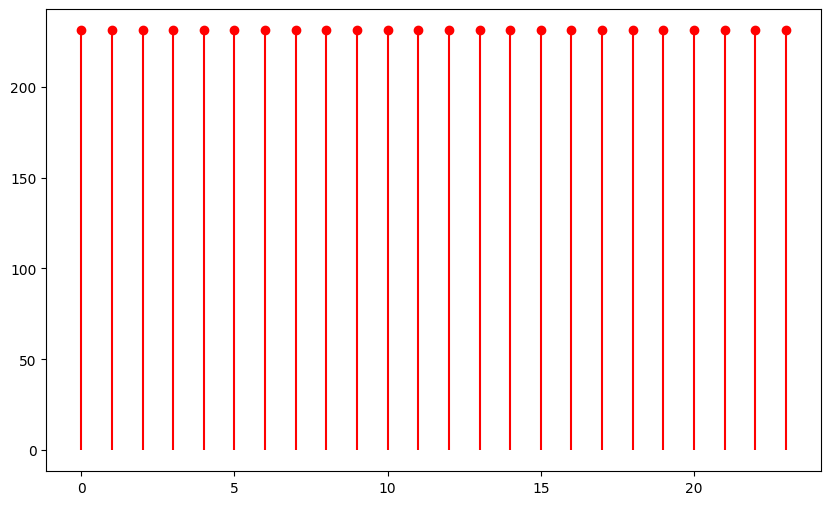

In [269]:
# Plotear la señal
plt.figure(figsize=(10, 6))

for i in range(0, len(illuminationTime)):
    plt.stem(i, illuminationTime[i], 'r', )

C:\Users\asier.marzo\AppData\Local\Temp\ipykernel_11696\492825542.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


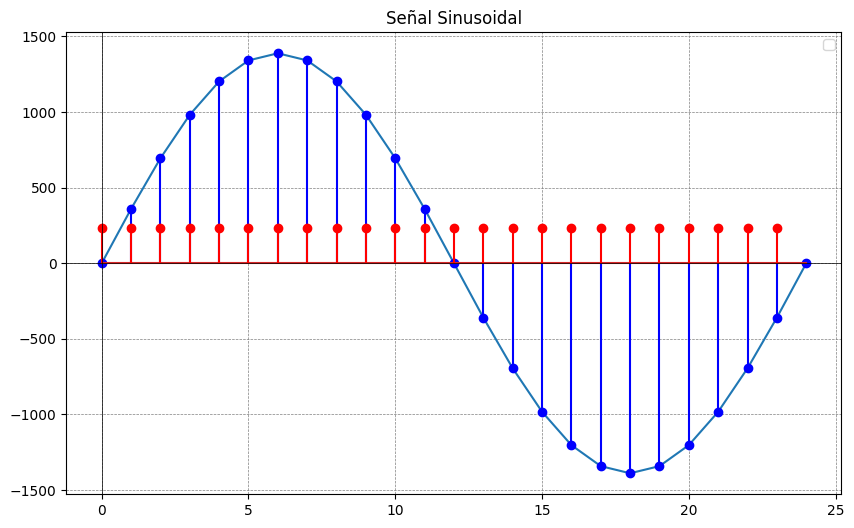

In [270]:
# Plotear la señal
plt.figure(figsize=(10, 6))
plt.plot(xs, ys)
plt.stem(xs,ys, 'b', )

for i in range(0, len(illuminationTime)):
    plt.stem(i,illuminationTime[i], 'r', )
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Señal Sinusoidal')
# plt.xlabel('Tiempo (microsegundos)')
# plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [271]:
decToHex_illumination
listPostIllu = []
if(patternPeriodEqualExposition == True):
    listPostIllu = decToHex_illumination
else:
    for i in range(0, len(decToHex_illumination)):
        listPostIllu.append(hex(postIllu))

# listPostIllu

In [272]:
if(linear):
    addWordLinear = '-Linear'
else:
    addWordLinear = ''

if(triggerIn):
    addWordTrigger = "-TriggerIn"
else:
    addWordTrigger = ''
    
if(cleanDMDAfterExposure):
    addWordDMD = "-DMD"
else:
    addWordDMD = ''
    
if(fullSinus):
    fullSin = ''
else:
    fullSin = "-halfSin"
    
if(triggerExt):
    addWordTrigIN = '-triggerExternal'
else:
    addWordTrigIN = ""
    
if(patternPeriodEqualExposition):
    addExpos = ''
else:
    addExpos = '-Exp'
    
if(reverse):
    addRev = '-reversed'
else:
    addRev = ''
writeToFile = open("./Solutions/"+color+"-Sinusoid-"+str(freq)+"Hz"+addRev+addWordTrigIN+addWordTrigger+addWordDMD+fullSin+addExpos+addWordLinear+".ini", "w")


In [273]:
writeToFile.write("APPCONFIG.VERSION.SUBMINOR 0x0 ; \n")
writeToFile.write("APPCONFIG.VERSION.MINOR 0x0 ; \n")
writeToFile.write("APPCONFIG.VERSION.MAJOR 0x3 ; \n")
writeToFile.write("DEFAULT.FIRMWARE_TAG 0x0 ; \n")
writeToFile.write("DEFAULT.AUTOSTART 0x0 ; \n")
writeToFile.write("DEFAULT.DISPMODE 0x1 ; \n")
writeToFile.write("DEFAULT.SHORT_FLIP 0x0 ; \n")
writeToFile.write("DEFAULT.LONG_FLIP 0x0 ; \n")
writeToFile.write("DEFAULT.TRIG_OUT_1.POL 0x0 ; \n")
writeToFile.write("DEFAULT.TRIG_OUT_1.RDELAY 0xbb ; \n")
writeToFile.write("DEFAULT.TRIG_OUT_1.FDELAY 0xbb ; \n")
writeToFile.write("DEFAULT.TRIG_OUT_2.POL 0x0 ; \n")
writeToFile.write("DEFAULT.TRIG_OUT_2.WIDTH 0xbb ; \n")
writeToFile.write("DEFAULT.TRIG_IN_1.DELAY 0x0 ; \n")
# writeToFile.write("DEFAULT.TRIG_IN_1.DELAY ")
# if(cleanDMDAfterExposure):
#     writeToFile.write("0x0 ; \n")
# else:
#     writeToFile.write("0x1 ; \n")
writeToFile.write("DEFAULT.TRIG_IN_2.POL 0x0 ; \n")
writeToFile.write("DEFAULT.RED_STROBE.RDELAY 0xbb ; \n")
writeToFile.write("DEFAULT.RED_STROBE.FDELAY 0xbb ; \n")
writeToFile.write("DEFAULT.GRN_STROBE.RDELAY 0xbb ; \n")
writeToFile.write("DEFAULT.GRN_STROBE.FDELAY 0xbb ; \n")
writeToFile.write("DEFAULT.BLU_STROBE.RDELAY 0xbb ; \n")
writeToFile.write("DEFAULT.BLU_STROBE.FDELAY 0xbb ; \n")
writeToFile.write("DEFAULT.INVERTDATA 0x0 ; \n")
writeToFile.write("DEFAULT.TESTPATTERN 0x0 ; \n")
writeToFile.write("DEFAULT.LEDCURRENT_RED 0xff ; \n")
writeToFile.write("DEFAULT.LEDCURRENT_GRN 0xff ; \n")
writeToFile.write("DEFAULT.LEDCURRENT_BLU 0xff ; \n")

writeToFile.write("DEFAULT.PATTERNCONFIG.PAT_EXPOSURE 0x0 ; \n")
writeToFile.write("DEFAULT.PATTERNCONFIG.PAT_PERIOD 0x0 ; \n")

# if(patternPeriodEqualExposition):
#     writeToFile.write("DEFAULT.PATTERNCONFIG.PAT_EXPOSURE 0x0 ; \n")
#     writeToFile.write("DEFAULT.PATTERNCONFIG.PAT_PERIOD 0x0 ; \n")
# else:
#     writeToFile.write("DEFAULT.PATTERNCONFIG.PAT_EXPOSURE ")
#     writeToFile.write(hex(postIllu))
#     writeToFile.write( " ; \n")
#     writeToFile.write("DEFAULT.PATTERNCONFIG.PAT_PERIOD ")
#     writeToFile.write(hex(postIllu))
#     writeToFile.write( " ; \n")
    
writeToFile.write("DEFAULT.PATTERNCONFIG.PAT_MODE 0x0 ; \n")
if(triggerExt):
    writeToFile.write("DEFAULT.PATTERNCONFIG.TRIG_MODE 0x3 ; \n")
else:
    writeToFile.write("DEFAULT.PATTERNCONFIG.TRIG_MODE 0x4 ; \n")
# if(triggerModeVsync):
#     writeToFile.write("0x4 ; \n") Vsync
# else:
#     writeToFile.write("0x3 ; \n") Internal/External
    
writeToFile.write("DEFAULT.PATTERNCONFIG.PAT_REPEAT 0x1 ; \n")

convertMultiple = hex(multiple-1)
writeToFile.write("DEFAULT.PATTERNCONFIG.NUM_SPLASH 0x" +convertMultiple +" ; \n")

writeToFile.write("DEFAULT.SPLASHLUT        0x0 ; \n")

# here enter as hex number of slices total -> 192 is 0xC0
convertSlices = hex(24*multiple)
writeToFile.write("DEFAULT.PATTERNCONFIG.NUM_LUT_ENTRIES 0x" + convertMultiple + " ; \n")
writeToFile.write("DEFAULT.PATTERNCONFIG.NUM_PATTERNS 0x" + convertMultiple + "; \n")



writeToFile.write("DEFAULT.SEQPATLUT ")

for j in range(0, multiple):
    if((j%2) == 0):
        for i in range(0, 24):
            writeToFile.write(bitplaneParam[i] + " " + str(decToHex_illumination[i]) + " " + str(listPostIllu[i]) + " ")
    else:
        if(reverse):
            for i in range(0, 24):
                # reverse
                writeToFile.write(bitplaneParam[23-i] + " " + str(decToHex_illumination[23-i]) + " " + str(listPostIllu[23-i]) + " ")
        else:
            for i in range(0, 24):
                writeToFile.write(bitplaneParam[i] + " " + str(decToHex_illumination[i]) + " " + str(listPostIllu[i]) + " ")
                
writeToFile.write("\n")

## CAREFUL WITH THE TRIGGERS!!!! CANT REMOVE FROM HERE SO FAR


writeToFile.write("DEFAULT.LED_ENABLE_MAN_MODE 0x0 ; \n")
writeToFile.write("DEFAULT.MAN_ENABLE_RED_LED 0x0 ; \n")
writeToFile.write("DEFAULT.MAN_ENABLE_GRN_LED 0x0 ; \n")
writeToFile.write("DEFAULT.MAN_ENABLE_BLU_LED 0x0 ; \n")
writeToFile.write("DEFAULT.PORTCONFIG.PORT 0x0 ; \n")
writeToFile.write("DEFAULT.PORTCONFIG.BPP 0x0 ; \n")
writeToFile.write("DEFAULT.PORTCONFIG.PIX_FMT 0x0 ; \n")
writeToFile.write("DEFAULT.PORTCONFIG.PORT_CLK 0x0 ; \n")
writeToFile.write("DEFAULT.PORTCONFIG.ABC_MUX 0x0 ; \n")
writeToFile.write("DEFAULT.PORTCONFIG.PIX_MODE 0x1 ; \n")
writeToFile.write("DEFAULT.PORTCONFIG.SWAP_POL 0x0 ; \n")
writeToFile.write("DEFAULT.PORTCONFIG.FLD_SEL 0x0 ; \n")
writeToFile.write("PERIPHERALS.I2CADDRESS[0] 0x34 ; \n")
writeToFile.write("PERIPHERALS.I2CADDRESS[1] 0x3a ; \n")
writeToFile.write("PERIPHERALS.I2CBUSYGPIO_ENABLE 0x0 ; \n")
writeToFile.write("PERIPHERALS.I2CBUSYGPIO_SELECT 0x0 ; \n")
writeToFile.write("DATAPATH.SPLASHSTARTUPTIMEOUT 0x1388 ; \n")
writeToFile.write("DATAPATH.SPLASHATSTARTUPENABLE 0x0 ; \n")
writeToFile.write("MACHINE_DATA.COLORPROFILE_0_BRILLIANTCOLORLOOK 0x0 ;")

writeToFile.close()

In [256]:
bitplaneParam[23], bitplaneParam[0]

('0x2115f', '0x421121')

In [257]:
orderBitplane = [24,9,10,11,12,13,14,15,16,1,2,3,4,5,6,7,8,17,18,19,20,21,22,23]


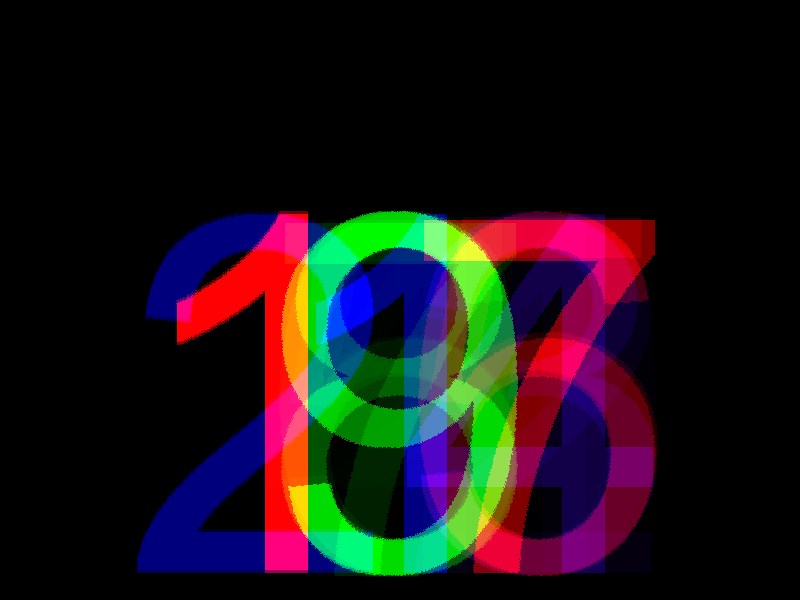

In [258]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Function to draw text onto a numpy array representing an image bitplane
def draw_text_on_bitplane(image_array, text, bitplane):
    width, height = image_array.shape[1], image_array.shape[0]
    image = Image.fromarray(np.zeros((height, width), dtype=np.uint8))  # create a single channel image
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 500)  # Use a TTF font file

    # Draw text
    text_left, text_top, text_right, text_bottom = draw.textbbox((0,0), text, font=font)
    text_width, text_height = (text_right - text_left, text_bottom - text_top)
    
#     text_width, text_height = draw.textlength(text, font=font)
    text_x = (width - text_width) // 2
    text_y = (height - text_height) // 2
    
    draw.text((text_x, text_y), text, font=font, fill=255)  # White text

    # Convert the drawn text to a binary pattern
    text_array = np.array(image)
    binImage = (text_array & 1)

    #add it to the corresponding bitplane
#     image_array[:, :, bitplane // 8] |=  binImage << (bitplane % 8)
    image_array[:, :, (orderBitplane[bitplane]-1) // 8] |=  binImage << ((orderBitplane[bitplane]-1) % 8)


# Function to generate the image with text patterns in each bitplane
def generate_pattern_image():
    width, height = 800, 600
    image_array = np.zeros((height, width, 3), dtype=np.uint8)

    for bitplane in range(0,24):
        draw_text_on_bitplane(image_array, str(bitplane + 1), bitplane)
        
    # Convert numpy array to PIL Image
    img = Image.fromarray(image_array)
    return img

# Generate the image
img = generate_pattern_image()

# Save the image
img.save('binary_pattern_image_with_text.png')

# print("Image saved as 'binary_pattern_image_with_text.png'")
img


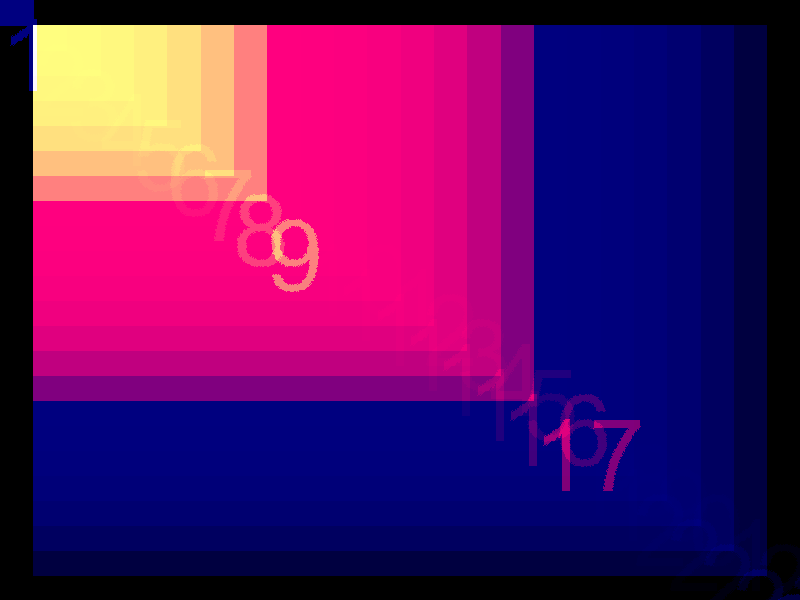

In [121]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Function to draw text onto a numpy array representing an image bitplane
def draw_square_on_bitplane(image_array, text, bitplane):
    width, height = image_array.shape[1], image_array.shape[0]
    image = Image.fromarray(np.zeros((height, width), dtype=np.uint8))  # create a single channel image
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 100)  # Use a TTF font file

    # Draw text
    text_left, text_top, text_right, text_bottom = draw.textbbox((0,0), text, font=font)
    text_width, text_height = (text_right - text_left, text_bottom - text_top)
    
#     text_width, text_height = draw.textlength(text, font=font)
    text_x = (width - text_width) // 2
    text_y = (height - text_height) // 2
    
    draw.text((width*bitplane/24, height*bitplane/24), text, font=font, fill=255)  # White text
    draw.rectangle((width/24*bitplane, height*bitplane/24, width/24, height/24), fill=255, outline=255)
#     draw.rectangle((width/24*bitplane, height*bitplane/24, (width/24*(bitplane+1)), height*(bitplane+1)/24), fill=255, outline=255)
    
#     numb = 0
#     for i in range(0, 5):
#         for j in range(0, 7):
#             numb = numb + 1 
#             if(numb == bitplane):
#                 draw.rectangle((width/4*i, height/6*j, width/4*(i+1), height/6*(j+1)), fill=255, outline=255)
    

    # Convert the drawn text to a binary pattern
    text_array = np.array(image)
    binImage = (text_array & 1)
    image_array[:, :, (orderBitplane[bitplane]-1) // 8] |=  binImage << ((orderBitplane[bitplane]-1) % 8)


# Function to generate the image with text patterns in each bitplane
def generate_square_image():
    width, height = 800, 600
    image_array = np.zeros((height, width, 3), dtype=np.uint8)

    for bitplane in range(0,24):
        draw_square_on_bitplane(image_array, str(bitplane+1), bitplane)

    # Convert numpy array to PIL Image
    img = Image.fromarray(image_array)
    return img

# Generate the image
img = generate_square_image()

# Save the image
img.save('pyramidthingy.png')
img


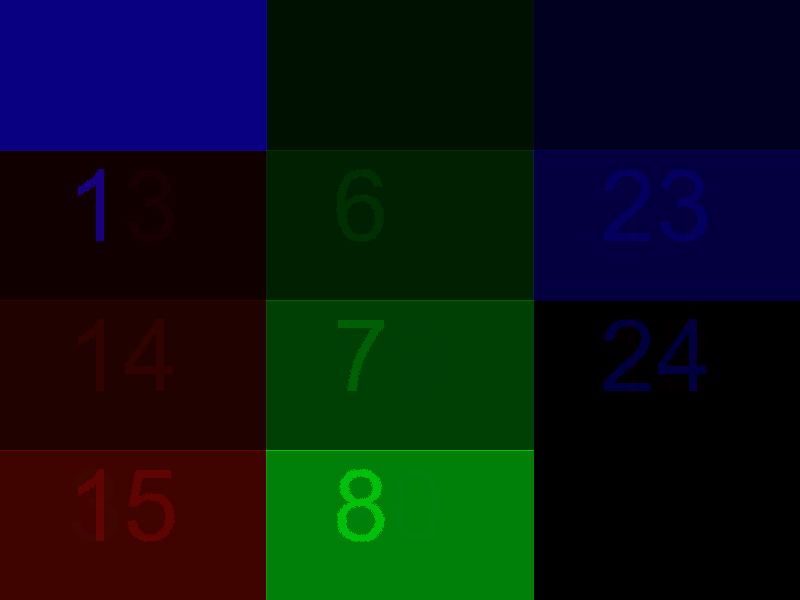

In [114]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Function to draw text onto a numpy array representing an image bitplane
def draw_square_on_bitplane(image_array, text, bitplane):
    width, height = image_array.shape[1], image_array.shape[0]
    image = Image.fromarray(np.zeros((height, width), dtype=np.uint8))  # create a single channel image
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 100)  # Use a TTF font file

    # Draw text
    text_left, text_top, text_right, text_bottom = draw.textbbox((0,0), text, font=font)
    text_width, text_height = (text_right - text_left, text_bottom - text_top)
    
#     text_width, text_height = draw.textlength(text, font=font)
    text_x = (width - text_width) // 2
    text_y = (height - text_height) // 2
    
#     draw.text((width*bitplane/24, height*bitplane/24), text, font=font, fill=255)  # White text
#     draw.rectangle((width/24*bitplane, height*bitplane/24, width/24, height/24), fill=255, outline=255)
    
    numb = 0
    for i in range(0, 4):
        for j in range(0, 5):
            numb = numb + 1
            if(numb == (bitplane % 12)+1):
#                 print(numb, bitplane)
                draw.rectangle((width/3*i, height/4*j, width/3*(i+1), height/4*(j+1)), fill=255, outline=255)
                draw.text((width/3*(i+0.25), height/4*(j+1)), text, font=font, fill=255)  # White text


    # Convert the drawn text to a binary pattern
    text_array = np.array(image)
    binImage = (text_array & 1)
    image_array[:, :, (orderBitplane[bitplane]-1) // 8] |=  binImage << ((orderBitplane[bitplane]-1) % 8)


# Function to generate the image with text patterns in each bitplane
def generate_square_image():
    width, height = 800, 600
    image_array = np.zeros((height, width, 3), dtype=np.uint8)

    for bitplane in range(0,24):
#         draw_text_on_bitplane(image_array, str(bitplane + 1), ((orderBitplane[bitplane]-1)+0)%24)
        draw_square_on_bitplane(image_array, str(bitplane+1), bitplane)

    # Convert numpy array to PIL Image
    img = Image.fromarray(image_array)
    return img

# Generate the image
img = generate_square_image()

# Save the image
img.save('binary_12square_image_with_text.png')

# print("Image saved as 'binary_pattern_image_with_text.png'")
img


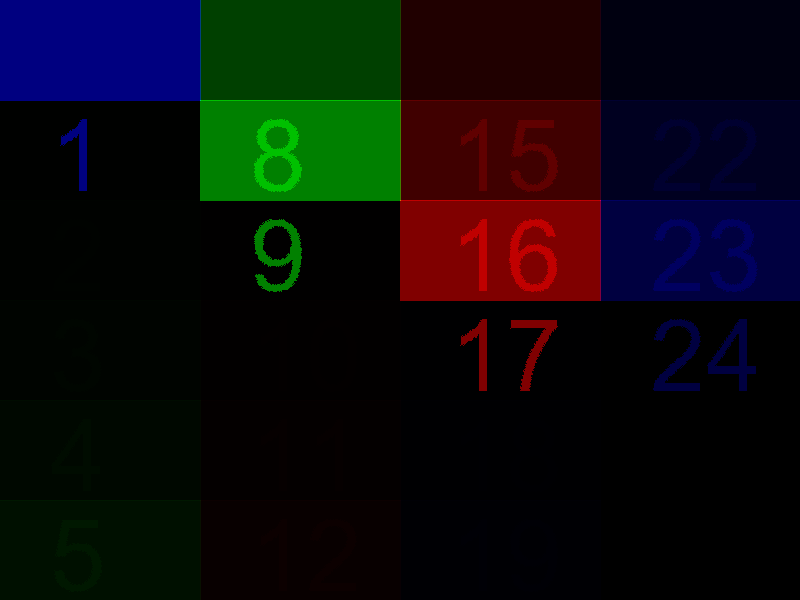

In [115]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Function to draw text onto a numpy array representing an image bitplane
def draw_square_on_bitplane(image_array, text, bitplane):
    width, height = image_array.shape[1], image_array.shape[0]
    image = Image.fromarray(np.zeros((height, width), dtype=np.uint8))  # create a single channel image
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 100)  # Use a TTF font file

    # Draw text
    text_left, text_top, text_right, text_bottom = draw.textbbox((0,0), text, font=font)
    text_width, text_height = (text_right - text_left, text_bottom - text_top)
    
#     text_width, text_height = draw.textlength(text, font=font)
    text_x = (width - text_width) // 2
    text_y = (height - text_height) // 2
    
#     draw.text((width*bitplane/24, height*bitplane/24), text, font=font, fill=255)  # White text
#     draw.rectangle((width/24*bitplane, height*bitplane/24, width/24, height/24), fill=255, outline=255)
    
    numb = 0
    for i in range(0, 5):
        for j in range(0, 7):
            numb = numb + 1
            if(numb == bitplane+1):
#                 print(numb, bitplane)
                draw.rectangle((width/4*i, height/6*j, width/4*(i+1), height/6*(j+1)), fill=255, outline=255)
                draw.text((width/4*(i+0.25), height/6*(j+1)), text, font=font, fill=255)  # White text


    # Convert the drawn text to a binary pattern
    text_array = np.array(image)
    binImage = (text_array & 1)
    image_array[:, :, (orderBitplane[bitplane]-1) // 8] |=  binImage << ((orderBitplane[bitplane]-1) % 8)


# Function to generate the image with text patterns in each bitplane
def generate_square_image():
    width, height = 800, 600
    image_array = np.zeros((height, width, 3), dtype=np.uint8)

    for bitplane in range(0,24):
#         draw_text_on_bitplane(image_array, str(bitplane + 1), ((orderBitplane[bitplane]-1)+0)%24)
        draw_square_on_bitplane(image_array, str(bitplane+1), bitplane)

    # Convert numpy array to PIL Image
    img = Image.fromarray(image_array)
    return img

# Generate the image
img = generate_square_image()

# Save the image
img.save('binary_24square_image_with_text.png')

# print("Image saved as 'binary_pattern_image_with_text.png'")
img
